<a href="https://colab.research.google.com/github/uditsevak/Udit_GDG_Tasks/blob/Task-4/Copy_of_GDG_Task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**GDG TASK 4**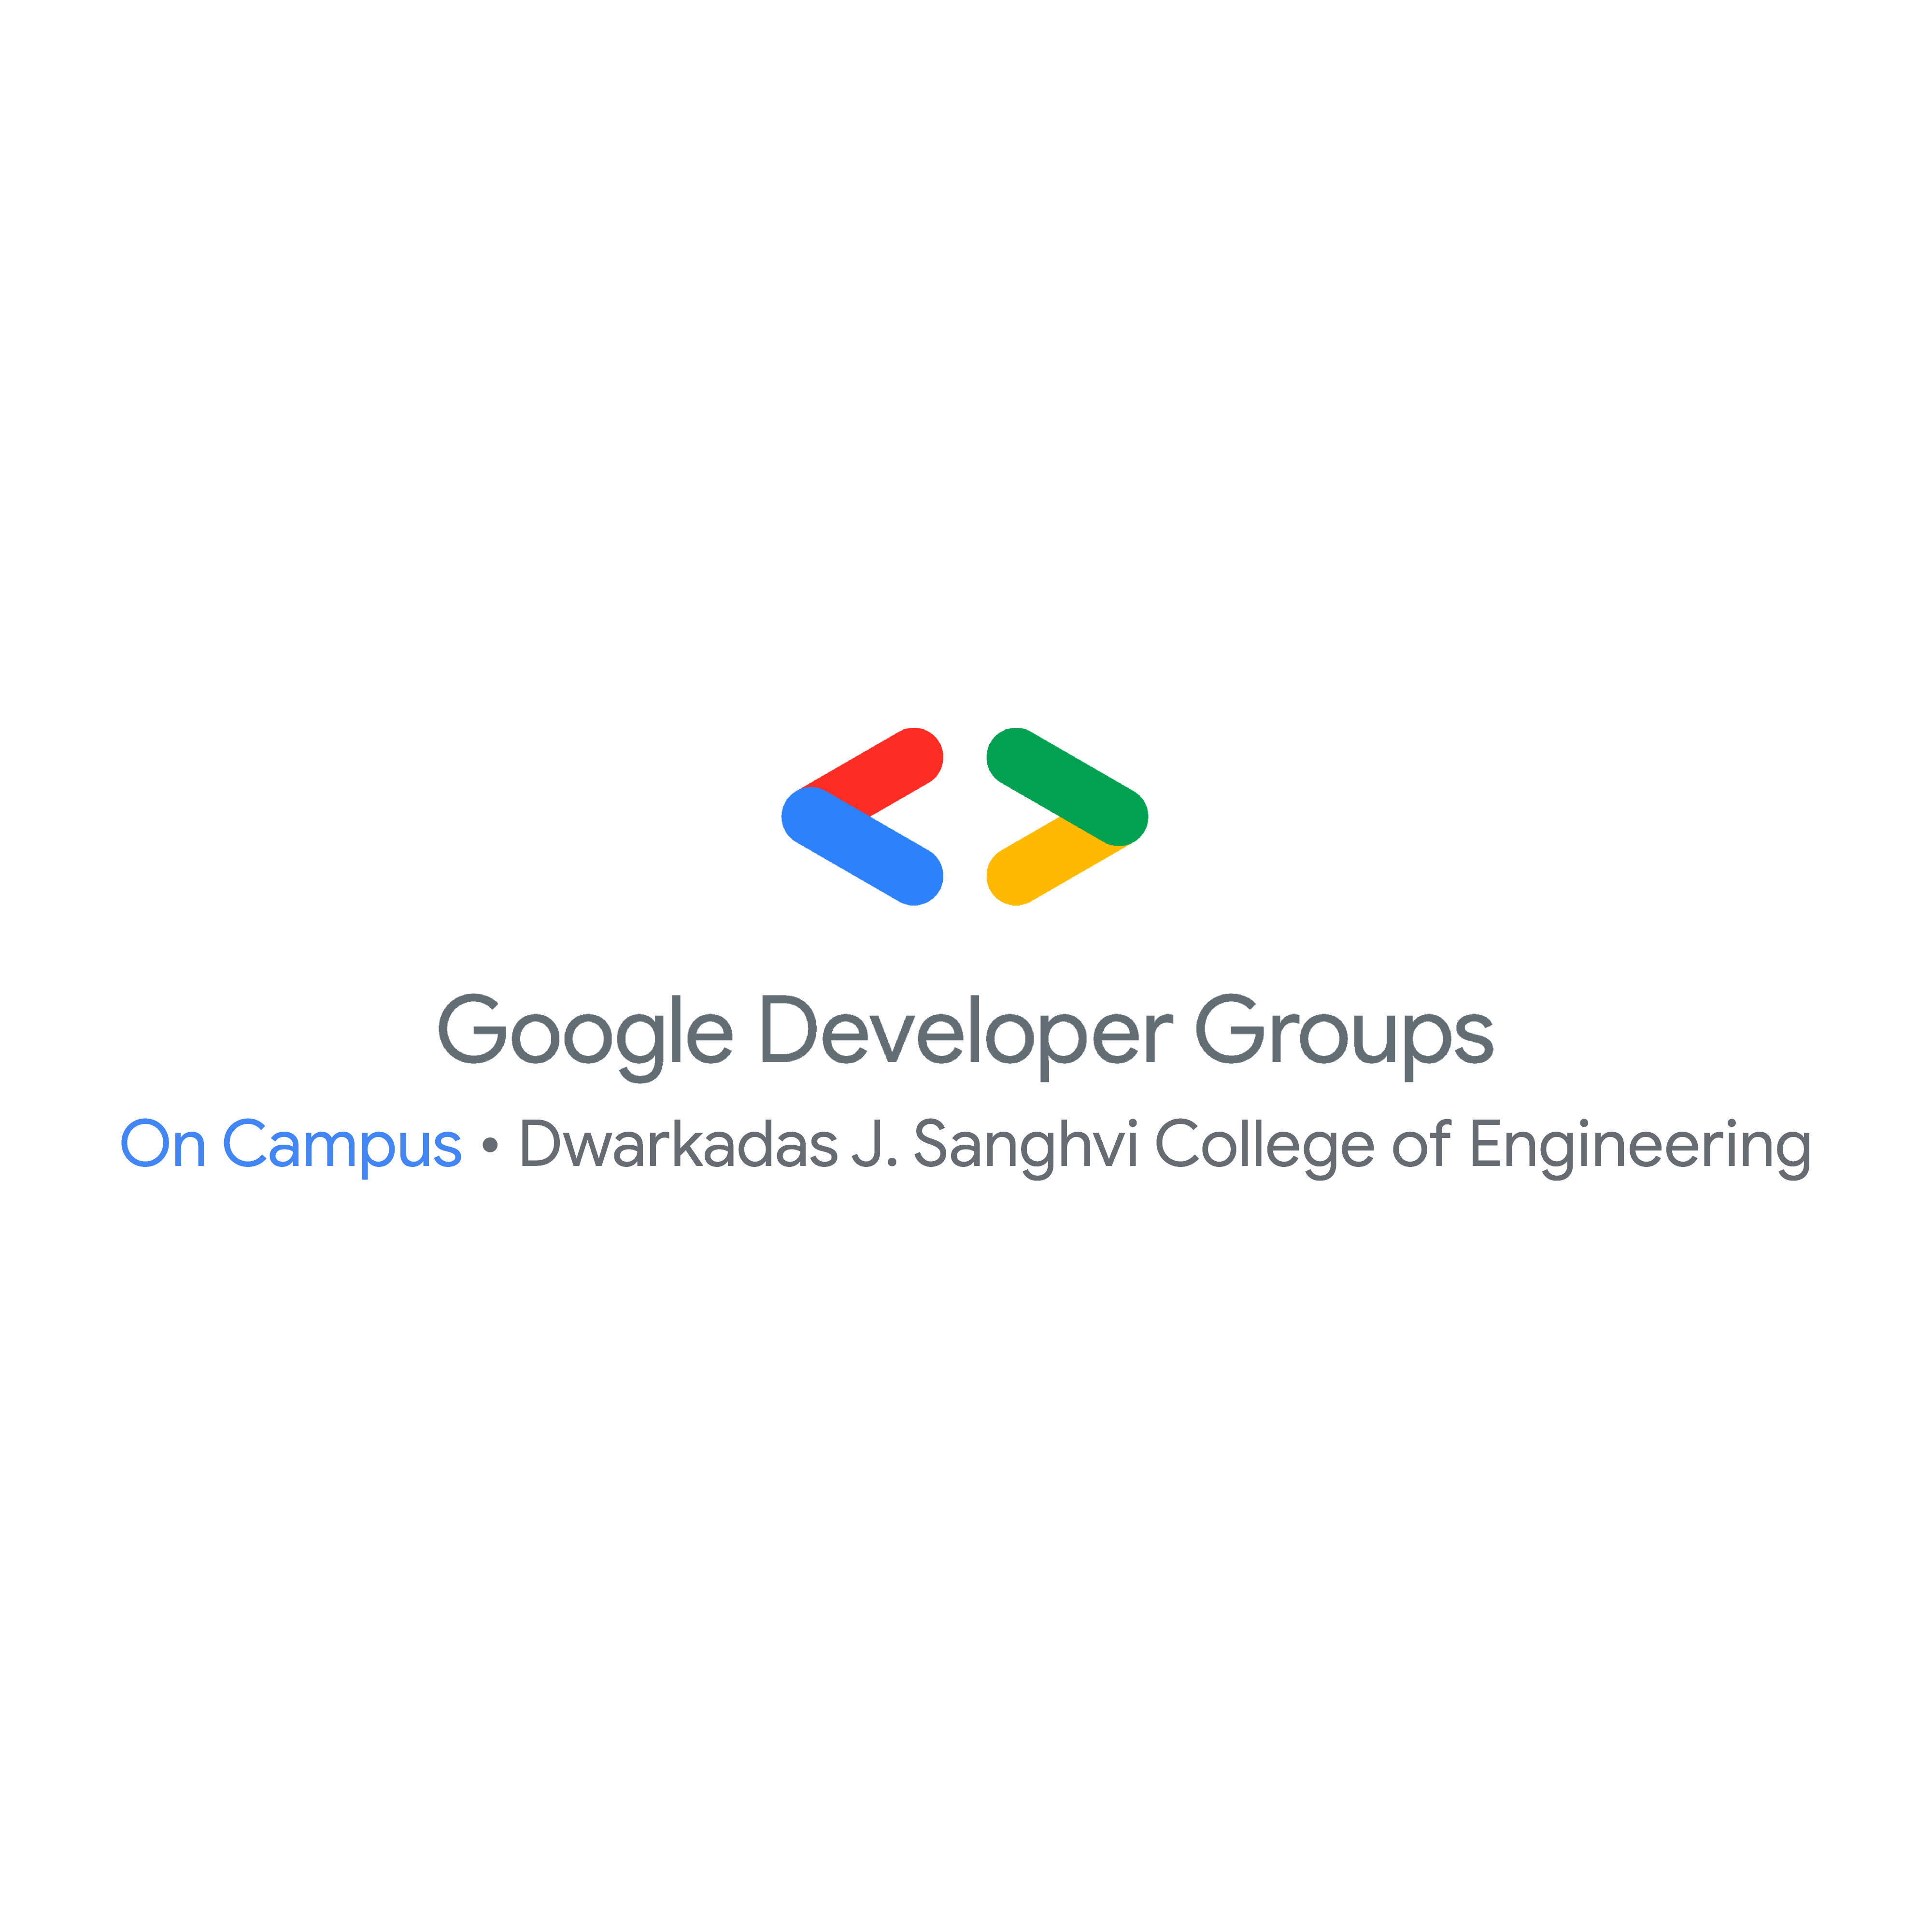

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In the task for this week, we will be exploring another ML Models like Decision Tree, Random Forest and Naive Bayes. We will also learn hyperparameter tuning using ensemble techniques (Bagging & Boosting) and Decision Tree Pruning.

**This Task has various theory questions to be answered here and there. Don't miss out on those, as they will make you'll conceptually stronger, and give a better understanding.**

### Overfitting and Underfitting [VERY IMPORTANT]:
https://www.youtube.com/watch?v=T9NtOa-IITo
Note : This concept can be seen in K Means and decision trees. In fact, we will look deeper into
this when we begin deep learning.

# Decision Tree Classifier

* Theory : https://youtu.be/7VeUPuFGJHk
* Theory: https://www.analyticsvidhya.com/blog/2021/08/decision-tree-algorithm/
* Implementation : https://youtu.be/HY2DcBhgwm0

Load the titanic dataset in a pandas dataframe (download dataset from https://www.kaggle.com/c/titanic/data and store it in the "Synapse" folder initially created for the interview tasks) Note that you have to download the train and test csv files seperately

<b>Read the titanic_data.csv using pandas and show the dataframe</b>

In [28]:
#write code here
import pandas as pd
df_test = pd.read_csv('test.csv')
df_train = pd.read_csv('train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Visualizing hidden Details

* print the name column of the data
* notice that the word after the first comma encapsulates the title of the person (Mr., Mrs, etc)
* extract the title using regular expression (help given below in the code)
* store the title in a new column in the dataframe. Name the column : Title

In [29]:
# try researching about regex
import re
df_train['Title'] = df_train['Name'].apply(lambda x: re.search('([A-Za-z]+)\.', x).group(1))
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


### Removing unnecessary columns
*   The columns PassengerId and Ticket play no logical role in being related to the survival of a passenger. Hence we will remove them.
*   We will also remove the Name column as we have done feature extraction and obtained titles instead. (test set might have extra titles which are not in the train set. Think about how we would consider them. This however doesn't affect task 1's objective)

In [30]:
#write code here
df_train.drop(['PassengerId','Ticket','Name'],axis=1,inplace=True)

### Nan analysis
*   write code to find the percentage of Nans in each column and visualize it in a tabular format
*   remove any column having more than 50% Nans as they would be of no use

In [32]:
#write code here

percent_missing = df_train.isnull().sum() * 100 / len(df_train)

missing_value_df_train = pd.DataFrame({'column_name': df_train.columns,
                                 'percent_missing': percent_missing})

columns_to_remove = missing_value_df_train[missing_value_df_train['percent_missing'] > 50]['column_name']
df_train = df_train.drop(columns=columns_to_remove)

#missing_value_df_train # Cabin removed

*   Fill Nans in the Embark column with the statistical mode
*   Fill Nans in the Age column with it's statistical mean

In [33]:
#write code here

df_train['Embarked'].fillna(df_train['Embarked'].mode()[0], inplace=True)
df_train['Age'].fillna(df_train['Age'].mean(), inplace=True)

<ipython-input-33-1ae4afba0b44>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Embarked'].fillna(df_train['Embarked'].mode()[0], inplace=True)
<ipython-input-33-1ae4afba0b44>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value,

In [34]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,Mr
1,1,1,female,38.0,1,0,71.2833,C,Mrs
2,1,3,female,26.0,0,0,7.9250,S,Miss
3,1,1,female,35.0,1,0,53.1000,S,Mrs
4,0,3,male,35.0,0,0,8.0500,S,Mr


### Adding features to the dataset
*   Read the kaggle link (titanic dataset) provided above and see what the two columns SibSP and Parch signify
*   Using that create a new column called **Family_members**
*   Fill it with the sum of SibSP and Parch

In [35]:
#write code here
df_train['Family_members'] = df_train['SibSp'] + df_train['Parch']

In [36]:
#Normalize the columns ("Age", "Fare", "Family_members")

cols_to_norm = ['Age', 'Fare', 'Family_members']
df_train[cols_to_norm] = df_train[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [37]:
#apply one hot encoding on the columns ('Pclass','Sex','Title','Embarked')

cols_to_encode = ['Pclass', 'Sex', 'Title', 'Embarked']
df_train = pd.get_dummies(df_train, columns=cols_to_encode, drop_first=True)

<b>extract the y label (survived) from the dataframe and store it in a new variable</b>

In [38]:
#write code here
y = df_train['Survived']
X = df_train.drop('Survived', axis=1)

<b>remove the y_label (survived) from the dataframe</b>

In [39]:
#write code here
df_train.drop('Survived', axis=1, inplace=True)

<b>Split the data into train and test. (do a split in the ratio 70:30)</b>

In [40]:
#write code here
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

<b>Now that you have the entire preprocessed and split data, implement the decision tree algorithm from sklearn and fit it to this dataset</b> <br>



In [41]:
#write code herefrom sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier(random_state=42)

dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

<b>Print the Model Accuracy</b>

In [42]:
#write code here
from sklearn.metrics import accuracy_score
y_pred = dt_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7686567164179104


## Explain: Give a Real life Example where Decision Tree Classifier can be used.

Ans:A bank can use a Decision Tree Classifier to predict if a customer is likely to default on a loan. The model would be trained on past loan applications with information like income, credit score, and employment history.


Now that you have your first result, make sure that you play with the hyperparameters to get a better result. Visualize results, try different hyperparameters by using a loop, GET CREATIVE!<br>

Machine learning is an iteritive process. You will have to keep playing with hyperparameters and algorithms. No fixed algorithm will work on a fixed dataset.

Take this up as a challenge. The person with the best accuracy wins the round!

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best Accuracy Score: 0.8154064516129033
Test Accuracy: 0.7835820895522388


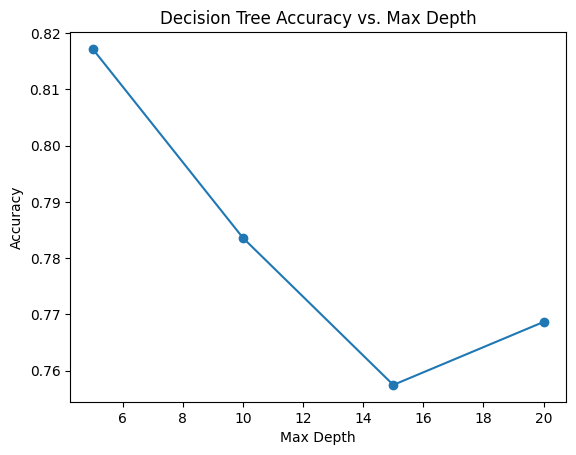

In [43]:
#plot a graph that shows the train and test accuracy for increasing depth of the tree (do for 10)

from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Accuracy Score:", best_score)

y_pred = grid_search.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)

max_depths = param_grid['max_depth']
accuracy_scores = []
for depth in max_depths:
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

plt.plot(max_depths, accuracy_scores, marker='o')
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.title("Decision Tree Accuracy vs. Max Depth")
plt.show()  # To see the plot in Colab, run this line

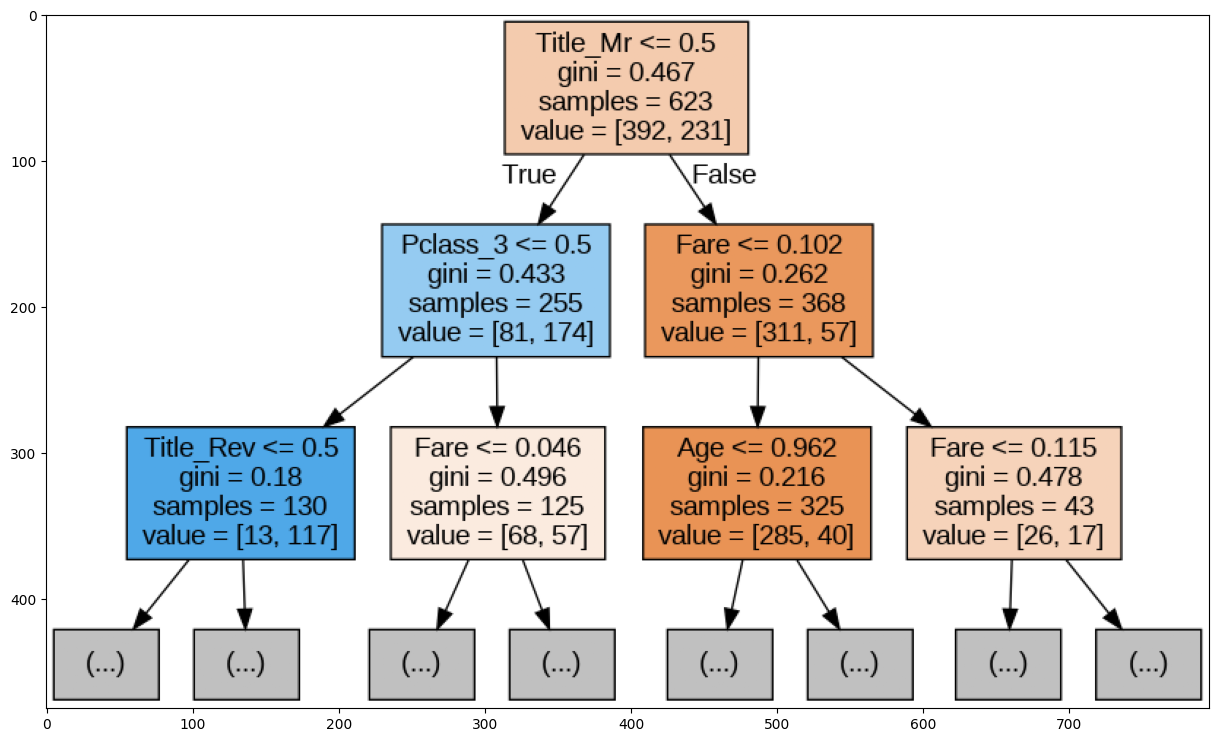

In [44]:
#complete the code below to create an image of the decision tree
from sklearn import tree
!pip install graphviz
decision_tree = tree.export_graphviz(dt, out_file='tree.dot', feature_names=X_train.columns, max_depth=2, filled=True)
!dot -Tpng tree.dot -o tree.png # to convert the file
image = plt.imread('tree.png')
plt.figure(figsize=(15,15))
plt.imshow(image)

<b>print the test accuracy and train accuracy here</b>

In [47]:
#write code here
y_train_pred = dt.predict(X_train)
train_accuracy = r2_score(y_train, y_train_pred)
print(f"Train Accuracy: {train_accuracy}")

Train Accuracy: 0.9243197278911565


## Explain: What is your understanding of the charts you made above?

 Ans : The chart above shows how the decision tree is working . for example it sees if Title is Mr or not and then proceeds to the next tree


# Naive Bayes Algorithm

* Theory : https://youtu.be/jS1CKhALUBQ
* Theory:
https://www.analyticsvidhya.com/blog/2021/09/naive-bayes-algorithm-a-complete-guide-for-data-science-enthusiasts/
* Implementation : https://youtu.be/nHIUYwN-5rM

In [49]:
# Write a code to implement naive bayes algorithm, and give the accuracy for the same
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(X_train,y_train)
y_pred_nb=gnb.predict(X_test)
accuracy_nb=accuracy_score(y_test,y_pred_nb)
print("Accuracy:",accuracy_nb)

Accuracy: 0.5970149253731343


## Explain: What is the difference between Decision Tree Classifier and Naive Bayes algorithm?

Ans: In decision tree classifier, it forms number of trees and then asks a question in each tree where the output is either true or false. Then procees onto the next tree.
In Naive Bayes it uses probability to predict the output


## Optimizing Methods

We can even use Ensemble Methods like **bagging (random forest)**, **boosting (adaboost)** and **Pruning** to improve your accuracy. Again creating a loop of hyperparameters and then finding the best among them is a daunting task. To reduce the efforts, we can use a special technique known as **GridSearchCV**. It finds the best hyperparameters for your model without you having to write multiple loops and evaluating them.

1. GridSearchCV for Random Forest Classifier: https://youtu.be/c4mS7KaOIGY
2. GridSearchCV for Adaboost Classifier: https://youtu.be/JmXnztjULnQ

### 1. Bagging

* Theory : https://www.youtube.com/watch?v=KIOeZ5cFZ50
* Theory :
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
* Implementation : https://www.youtube.com/watch?v=MxiktOPmhV8&t=2s

In [50]:
#write code here
from sklearn.ensemble import RandomForestClassifier
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf= RandomForestClassifier()

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_rf = grid_search.best_estimator_

print("Best Hyperparameters:", best_params)
print("Best Accuracy Score:", best_score)

y_pred_rf = best_rf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_rf)
print("Test Accuracy:", test_accuracy)





Best Hyperparameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Best Accuracy Score: 0.8411225806451614
Test Accuracy: 0.8246268656716418


## Explain: Under what condition will Random Forest and Decision Trees have the same accuracy?

Ans: The accuracy of both can be same when the dataset is small or simple .
Can also be similar if decision tree is overfitting


## Extra - BaggingClassifier

In [53]:
#write a code to implement BaggingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0]
}
base_estimator = ExtraTreesClassifier(random_state=42)  # You can use any base estimator here
bagging_clf = BaggingClassifier(estimator=base_estimator, random_state=42)
grid_search = GridSearchCV(bagging_clf, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X, y)
best_bagging_clf = grid_search.best_estimator_
best_params = grid_search.best_params_
predictions = best_bagging_clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Best Hyperparameters:", best_params)
print("Accuracy:", accuracy)

Best Hyperparameters: {'max_features': 0.5, 'max_samples': 0.5, 'n_estimators': 10}
Accuracy: 0.8656716417910447


## Explain: What is the difference between Random Forest and Bagging Classifier

Ans: In RandomForest it randomly selects some of the features for each tree at each node. While in Bagging it uses all features to train at a node

### 2. Boosting

* Theory : https://www.youtube.com/watch?v=NLRO1-jp5F8&t=724s
* Theory :
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
* Implementation : https://www.youtube.com/watch?v=7xHM93WXOu8

In [54]:
#write code here
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

ada_boost = AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=42)

ada_boost.fit(X_train, y_train)

y_pred_ada = ada_boost.predict(X_test)
accuracy_ada = accuracy_score(y_test, y_pred_ada)
print("Accuracy:", accuracy_ada)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy: 0.7985074626865671


## Explain: What is the difference between Bagging and Boosting?

Ans:In bagging it creates subsets of data randomly, and in boosting it trains model sequentially . In boosting model is trained iteratively improving the perfomance of the previous one

### 3. Pruning Techniques

https://towardsdatascience.com/build-better-decision-trees-with-pruning-8f467e73b107

In [55]:
#write code here
from sklearn.metrics import make_scorer
from sklearn.model_selection import ParameterGrid
param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [0.5,0.7,1]}

scoring = make_scorer(accuracy_score)
grid_search= GridSearchCV(dt_classifier, param_grid, cv=5, scoring=scoring)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_model= grid_search.best_estimator_
print("Best Hyperparameters:", best_params)
print("Best Accuracy Score:", best_score)

accuracy_ada = accuracy_score(y_test, y_pred_ada)
print("Accuracy:", accuracy_ada)


Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best Accuracy Score: 0.8154064516129033
Accuracy: 0.7985074626865671


<b>Note that the accuracy on the test set will be considered and brownie points for *not* overfitting the model in the process</b>

## Explain: After studying these techniques, analyse which method gives you the best accuracy and choose it as your most optimal model.

Ans: Extra bagging classifier


# **Compulsory Task**

Research and create a short blog on the topic of **XG Boost and AdaBoost Classifier and Regressor**.

# **XGBoost vs. AdaBoost: What’s the Difference?**

Okay, so boosting algorithms like XGBoost and AdaBoost are everywhere in machine learning. At first, they sound super complicated, but honestly, once you break them down, they’re pretty straightforward. If you’ve ever had to fix your mistakes over and over again to get better at something, you’ll get the idea. Let me explain in simple terms.



### **What Is Boosting?**  

Think of it like this: you’re preparing for an exam, but you’re really bad at a few topics. So, you focus extra hard on those weak areas until you get better. Boosting in machine learning is basically the same. It takes a bunch of “meh” models (weak learners, usually decision trees) and makes them learn from their mistakes until they work together as one strong model.  


### **What Is AdaBoost?**

AdaBoost, short for **Adaptive Boosting**, is the simpler one to understand. Here’s how it works:  

1. Start with a simple model (like a decision stump—it’s basically a baby decision tree).  
2. It checks where it messed up and gives more attention (or weight) to those mistakes.  
3. The next model tries harder on those tricky parts.  
4. Repeat until you have a decent overall model.  

**AdaBoost Classifier**:  
This is used for tasks where you have to decide between categories, like "spam vs. not spam" or "pass vs. fail."  

**AdaBoost Regressor**:  
It can predict continuous values, like house prices, but it’s not super popular for regression tasks because there are better options (like XGBoost).

**Pros:**  
- Easy to use and understand.  
- Great for smaller datasets.  

**Downsides:**  
- Struggles with noisy data (it over-focuses on outliers).  
- Gets slow with bigger datasets.  



### **What About XGBoost?**  

XGBoost stands for **Extreme Gradient Boosting**, and it’s like the overachiever of boosting algorithms. It takes the concept of gradient boosting (a fancier version of AdaBoost) and supercharges it with optimizations to make it faster and more accurate.

Here’s the gist of how XGBoost works:  
1. It builds a series of trees, with each one trying to fix the errors of the one before it.  
2. It uses something called **gradient descent** to minimize errors (don’t worry, the math isn’t as scary as it sounds).  
3. Plus, it’s optimized for speed—it can handle missing values and work with large datasets efficiently.

**XGBoost Classifier**:  
Perfect for tasks with multiple categories, like classifying animals as cats, dogs, or birds.  

**XGBoost Regressor**:  
Amazing for predicting continuous values, like stock prices or sales over time.  

**Pros:**  
- Super fast and handles large datasets well.  
- It’s the go-to for Kaggle competitions and tough ML tasks.  

**Downsides:**  
- Can feel like a Rubik’s cube when you’re tuning parameters.  
- Might be overkill for small projects.  



### **AdaBoost vs. XGBoost: Quick Summary**  

| Feature               | AdaBoost                         | XGBoost                               |
|------------------------|----------------------------------|---------------------------------------|
| **Speed**             | Slower, especially on big data   | Super fast and optimized             |
| **Data Handling**     | Doesn’t handle missing data well | Can handle missing values easily      |
| **Complexity**        | Simple and beginner-friendly     | Advanced but worth it                |
| **Classifier Use**    | Good for binary classification   | Great for multi-class problems        |
| **Regressor Use**     | Okay for simple tasks            | Excellent for regression tasks        |



### **When to Use Which?**

- **Go with AdaBoost** if:  
  - You’re working on a small, clean dataset.  
  - You want something simple to understand and implement.  

- **Go with XGBoost** if:  
  - You’re dealing with a large dataset or a tough problem.  
  - Speed and accuracy are critical.  



### **Real-Life Use Cases**  

- **AdaBoost Classifier:** Email spam detection, basic fraud detection.  
- **AdaBoost Regressor:** Predicting basic stuff like house prices.  

- **XGBoost Classifier:** Image classification, customer segmentation.  
- **XGBoost Regressor:** Sales forecasting, stock price prediction.  



# **End of Task**

